## Q3 - Is availability of healthcare facilities compared to population of the country such as hospital beds.

•	Lower Availability of Hospital Beds: Bolivia, Malaysia, Sweden, and South Africa have fewer hospital beds per 1000 people, indicating lower capacity to accommodate patients.

•	Moderate Availability of Hospital Beds: Countries like Canada, Denmark, United Kingdom, United States, Ireland, Spain, and others have a moderate number of hospital beds per 1000 people, suggesting a moderate capacity to handle healthcare demands.

•	Higher Availability of Hospital Beds: Countries including Slovenia, Luxembourg, Switzerland, Estonia, and others have a higher number of hospital beds per 1000 people, indicating a relatively higher capacity to handle healthcare demands.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from matplotlib.pyplot import *
import pandas as pd
import hvplot.pandas
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
pd.set_option('mode.chained_assignment', None)
pd.options.display.float_format = '{:.1f}'.format

In [2]:
# Study data files
covid_data_path = "Resources/owid-covid-data.csv"
country_path = "Resources/country-capitals.csv"

In [3]:
# Read the covid data
covid_data = pd.read_csv(covid_data_path)
covid_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.7,0.5,64.8,0.5,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.7,0.5,64.8,0.5,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.7,0.5,64.8,0.5,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.7,0.5,64.8,0.5,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.7,0.5,64.8,0.5,41128772.0,NaN,NaN,NaN,NaN


In [4]:
# Read the covid data
# country_map = pd.read_csv(country_path,error_bad_lines=False)
country_map = pd.read_csv(country_path)
country_map.tail()

,CountryName,CapitalName,CapitalLatitude,CapitalLongitude,CountryCode,ContinentName
234,Wallis and Futuna,Mata-Utu,-13.9,-171.9,WF,Australia
235,Yemen,Sanaa,15.3,44.2,YE,Asia
236,Zambia,Lusaka,-15.4,28.3,ZM,Africa
237,Zimbabwe,Harare,-17.8,31.0,ZW,Africa
238,US Minor Outlying Islands,Washington,38.9,-77.0,UM,Australia


In [5]:
# Show all the columns in covid data
covid_data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [6]:
# Reduce covid data columns
# covid_data_reduced_columns=covid_data[['continent','location','date','hosp_patients','hospital_beds_per_thousand','population',
#       'total_cases_per_million','median_age','gdp_per_capita','life_expectancy']]

covid_data_reduced_columns=covid_data[['continent','location','date','hosp_patients_per_million','hospital_beds_per_thousand','population',
      'total_cases_per_million','median_age','gdp_per_capita','life_expectancy','excess_mortality_cumulative_per_million']]
covid_data_reduced_columns

,continent,location,date,hosp_patients_per_million,hospital_beds_per_thousand,population,total_cases_per_million,median_age,gdp_per_capita,life_expectancy,excess_mortality_cumulative_per_million
0,Asia,Afghanistan,2020-01-03,NaN,0.5,41128772.0,NaN,18.6,1804.0,64.8,NaN
1,Asia,Afghanistan,2020-01-04,NaN,0.5,41128772.0,NaN,18.6,1804.0,64.8,NaN
2,Asia,Afghanistan,2020-01-05,NaN,0.5,41128772.0,NaN,18.6,1804.0,64.8,NaN
3,Asia,Afghanistan,2020-01-06,NaN,0.5,41128772.0,NaN,18.6,1804.0,64.8,NaN
4,Asia,Afghanistan,2020-01-07,NaN,0.5,41128772.0,NaN,18.6,1804.0,64.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...
325565,Africa,Zimbabwe,2023-07-08,NaN,1.7,16320539.0,16274.2,19.6,1899.8,61.5,NaN
325566,Africa,Zimbabwe,2023-07-09,NaN,1.7,16320539.0,16274.2,19.6,1899.8,61.5,NaN
325567,Africa,Zimbabwe,2023-07-10,NaN,1.7,16320539.0,16274.2,19.6,1899.8,61.5,NaN
325568,Africa,Zimbabwe,2023-07-11,NaN,1.7,16320539.0,16274.2,19.6,1899.8,61.5,NaN


In [7]:
# Identify incomplete rows
covid_data_reduced_columns.count()

continent                                  310084
location                                   325570
date                                       325570
hosp_patients_per_million                   37821
hospital_beds_per_thousand                 222734
population                                 325570
total_cases_per_million                    288176
median_age                                 256933
gdp_per_capita                             251793
life_expectancy                            299404
excess_mortality_cumulative_per_million     11409
dtype: int64

In [8]:
# Drop all rows with missing information
covid_data_reduced_columns=covid_data_reduced_columns.dropna(how='any')

In [9]:
 #Verify dropped rows
covid_data_reduced_columns.count()
covid_data_reduced_columns

,continent,location,date,hosp_patients_per_million,hospital_beds_per_thousand,population,total_cases_per_million,median_age,gdp_per_capita,life_expectancy,excess_mortality_cumulative_per_million
16837,Oceania,Australia,2020-04-05,17.5,3.8,26177410.0,215.3,37.9,44648.7,83.4,35.0
16844,Oceania,Australia,2020-04-12,8.7,3.8,26177410.0,240.2,37.9,44648.7,83.4,39.0
16851,Oceania,Australia,2020-04-19,6.5,3.8,26177410.0,251.6,37.9,44648.7,83.4,40.5
16858,Oceania,Australia,2020-04-26,4.3,3.8,26177410.0,256.1,37.9,44648.7,83.4,40.9
16865,Oceania,Australia,2020-05-03,2.7,3.8,26177410.0,259.1,37.9,44648.7,83.4,39.5
...,...,...,...,...,...,...,...,...,...,...,...
307544,North America,United States,2023-04-23,30.5,2.8,338289856.0,305004.5,38.3,54225.4,78.9,3745.3
307551,North America,United States,2023-04-30,27.6,2.8,338289856.0,305260.1,38.3,54225.4,78.9,3744.3
307558,North America,United States,2023-05-07,24.9,2.8,338289856.0,305488.2,38.3,54225.4,78.9,3743.2
307565,North America,United States,2023-05-14,22.9,2.8,338289856.0,305763.9,38.3,54225.4,78.9,3742.8


In [10]:
 # Show data types
covid_data_reduced_columns.dtypes

continent                                   object
location                                    object
date                                        object
hosp_patients_per_million                  float64
hospital_beds_per_thousand                 float64
population                                 float64
total_cases_per_million                    float64
median_age                                 float64
gdp_per_capita                             float64
life_expectancy                            float64
excess_mortality_cumulative_per_million    float64
dtype: object

In [11]:
 # Change data type from object to date, convert to datetime
# covid_data_reduced_columns['date'] = covid_data_reduced_columns['date'].astype('datetime64[ns]')
covid_data_reduced_columns['date'] = pd.to_datetime(covid_data_reduced_columns['date'])

In [12]:
 # Add new column Year Month, Year
# covid_data['Year_Month'] = pd.to_datetime(covid_data['date']).dt.to_period('M')
covid_data_reduced_columns['Year'] = covid_data_reduced_columns['date'].dt.strftime('%Y')
covid_data_reduced_columns

,continent,location,date,hosp_patients_per_million,hospital_beds_per_thousand,population,total_cases_per_million,median_age,gdp_per_capita,life_expectancy,excess_mortality_cumulative_per_million,Year
16837,Oceania,Australia,2020-04-05,17.5,3.8,26177410.0,215.3,37.9,44648.7,83.4,35.0,2020
16844,Oceania,Australia,2020-04-12,8.7,3.8,26177410.0,240.2,37.9,44648.7,83.4,39.0,2020
16851,Oceania,Australia,2020-04-19,6.5,3.8,26177410.0,251.6,37.9,44648.7,83.4,40.5,2020
16858,Oceania,Australia,2020-04-26,4.3,3.8,26177410.0,256.1,37.9,44648.7,83.4,40.9,2020
16865,Oceania,Australia,2020-05-03,2.7,3.8,26177410.0,259.1,37.9,44648.7,83.4,39.5,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
307544,North America,United States,2023-04-23,30.5,2.8,338289856.0,305004.5,38.3,54225.4,78.9,3745.3,2023
307551,North America,United States,2023-04-30,27.6,2.8,338289856.0,305260.1,38.3,54225.4,78.9,3744.3,2023
307558,North America,United States,2023-05-07,24.9,2.8,338289856.0,305488.2,38.3,54225.4,78.9,3743.2,2023
307565,North America,United States,2023-05-14,22.9,2.8,338289856.0,305763.9,38.3,54225.4,78.9,3742.8,2023


In [13]:
# Select date range from 2020 to 2022, change data type from object to int
covid_data_reduced_columns['Year'] = covid_data_reduced_columns['Year'].astype(int)
new_covid_data=covid_data_reduced_columns.loc[covid_data_reduced_columns['Year']<=2022,:]
new_covid_data.tail()
new_covid_data.dtypes

continent                                          object
location                                           object
date                                       datetime64[ns]
hosp_patients_per_million                         float64
hospital_beds_per_thousand                        float64
population                                        float64
total_cases_per_million                           float64
median_age                                        float64
gdp_per_capita                                    float64
life_expectancy                                   float64
excess_mortality_cumulative_per_million           float64
Year                                                int64
dtype: object

In [14]:
# Select the number of hospital beds, ICU beds to analyse hospitalisation rates
# Calculate the number of hospital beds
hospital_beds_per_thousand=new_covid_data.groupby(["location"])["hospital_beds_per_thousand"].mean().sort_values()
hospital_beds=hospital_beds_per_thousand
hospital_beds.tail()

location
Romania        6.9
Austria        7.4
Bulgaria       7.5
South Korea   12.3
Japan         13.1
Name: hospital_beds_per_thousand, dtype: float64

In [15]:
# Average hospital patients each year (hospital patients - Number of COVID-19 patients in hospital on a given day)
# Year_2020=new_covid_data.loc[new_covid_data["Year"]==2020].groupby(["location"])["hosp_patients"].mean().sort_values()
# Year_2021=new_covid_data.loc[new_covid_data["Year"]==2021].groupby(["location"])["hosp_patients"].mean().sort_values()
# Year_2022=new_covid_data.loc[new_covid_data["Year"]==2022].groupby(["location"])["hosp_patients"].mean().sort_values()
Average_hospital_patients=new_covid_data.groupby(["location"])["hosp_patients_per_million"].mean().sort_values()

In [16]:
# Calculate the number of ICU beds per thousand
# Average ICU patients 
# ICU_patients=(new_covid_data.groupby(['location'])['icu_patients'].mean())
 # Population each country
population=new_covid_data.groupby(['location'])['population'].mean().sort_values()
population_in_million=population/1000000
population_in_million.head()

location
Luxembourg   0.6
Cyprus       0.9
Estonia      1.3
Slovenia     2.1
Lithuania    2.8
Name: population, dtype: float64

In [17]:
 # Calculate median_age each country
median_age=new_covid_data.groupby(['location'])['median_age'].mean().sort_values()

In [18]:
 # Calculate gdp_per_capita each country
gdp_per_capita=new_covid_data.groupby(['location'])['gdp_per_capita'].mean().sort_values()

In [19]:
# Calculate excess_mortality each country
excess_mortality=new_covid_data.groupby(['location'])['excess_mortality_cumulative_per_million'].mean().sort_values()

In [20]:
# Combine the series into a dataframe
# summary_df=pd.DataFrame({"Year 2020 Hospital Patients": Year_2020,"Year 2021 Hospital Patients": Year_2021,"Year 2022 Hospital Patients": Year_2022,"Hospital Beds":hospital_beds,"Hospital Patients":Average_hospital_patients,"Population (million)": population_in_million})
summary_df=pd.DataFrame({"Hospital Beds":hospital_beds,"Hospital Patients":Average_hospital_patients,"Population (million)": population_in_million,"Median Age":median_age,"GDP per capita":gdp_per_capita,'Excess Mortality':excess_mortality})

In [21]:
summary_df

,Hospital Beds,Hospital Patients,Population (million),Median Age,GDP per capita,Excess Mortality
location,,,,,,
Australia,3.8,48.4,26.2,37.9,44648.7,140.8
Austria,7.4,141.0,8.9,44.4,45436.7,1129.3
Belgium,5.6,154.6,11.7,41.8,42658.6,1389.5
Bolivia,1.1,91.4,12.2,25.4,6885.8,4046.3
Bulgaria,7.5,417.4,6.8,44.7,18563.3,5376.9
Canada,2.5,85.4,38.5,41.4,44017.6,550.4
Croatia,5.5,230.9,4.0,44.0,22669.8,2297.7
Cyprus,3.4,119.8,0.9,37.3,32415.1,447.0
Czechia,6.6,189.8,10.5,43.3,32605.9,2564.9


In [22]:
summary_df.count()

Hospital Beds           35
Hospital Patients       35
Population (million)    35
Median Age              35
GDP per capita          35
Excess Mortality        35
dtype: int64

In [23]:
hospital_beds_df=pd.DataFrame({"Hospital Beds":hospital_beds})
hospital_beds_df.describe()

,Hospital Beds
count,35.0
mean,4.7
std,2.6
min,1.1
25%,3.0
50%,3.8
75%,5.9
max,13.1


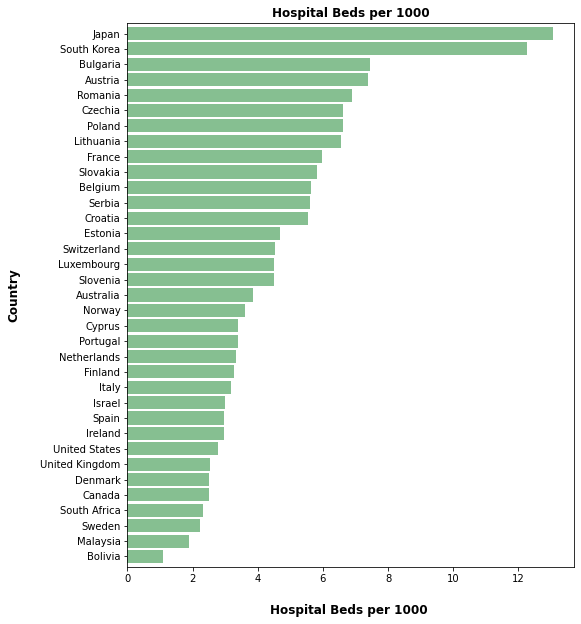

In [24]:
# Generate a bar plot showing the total number of hospital beds for each country.
barh = hospital_beds_df["Hospital Beds"].plot(kind="barh", figsize=(8, 10), color="#86bf91", zorder=2, width=0.85)
# Set x-axis label
barh.set_xlabel("Hospital Beds per 1000 ", labelpad=20, weight='bold', size=12)
# Set y-axis label
barh.set_ylabel("Country", labelpad=20, weight='bold', size=12)
# Set title
barh.set_title("Hospital Beds per 1000",  weight='bold', size=12)
# plt.tight_layout()
plt.savefig('Hospital Beds per 1000.png')  

In [25]:
# # Merge data to show latitude and longitude
# fullData = pd.merge(summary_df,country_map, left_on='location', right_on = 'CountryName')
fullData = pd.merge(country_map,summary_df, left_on='CountryName', right_on = 'location')
fullData.head()

,CountryName,CapitalName,CapitalLatitude,CapitalLongitude,CountryCode,ContinentName,Hospital Beds,Hospital Patients,Population (million),Median Age,GDP per capita,Excess Mortality
0,Australia,Canberra,-35.3,149.1,AU,Australia,3.8,48.4,26.2,37.9,44648.7,140.8
1,Austria,Vienna,48.2,16.4,AT,Europe,7.4,141.0,8.9,44.4,45436.7,1129.3
2,Belgium,Brussels,50.8,4.3,BE,Europe,5.6,154.6,11.7,41.8,42658.6,1389.5
3,Bolivia,La Paz,-16.5,-68.2,BO,South America,1.1,91.4,12.2,25.4,6885.8,4046.3
4,Bulgaria,Sofia,42.7,23.3,BG,Europe,7.5,417.4,6.8,44.7,18563.3,5376.9


In [30]:
# # Showing the hospital beds per 1000 for each country,configure the map plot
map_hospital_beds = fullData.hvplot.points(
    "CapitalLongitude",
    "CapitalLatitude",
    geo = True,
    tiles = "CartoLight",
    frame_width = 700,
    frame_height = 500,
    size = "Hospital Beds",
    scale = 20,
#   color = "Hospital Patients",
    color = "CountryName",
)

# # Display the map plot
map_hospital_beds
# plt.savefig('World Map Hospital Beds per 1000.png')

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [CapitalLongitude,CapitalLatitude]   (CountryName,Hospital Beds)

In [34]:
 # # Consider the availability of resources relative to the demand.
# # Generate a bar plot showing the population for each country.
Population_df=pd.DataFrame({"Population (million)": population_in_million})
Population_df.head()

,Population (million)
location,
Luxembourg,0.6
Cyprus,0.9
Estonia,1.3
Slovenia,2.1
Lithuania,2.8


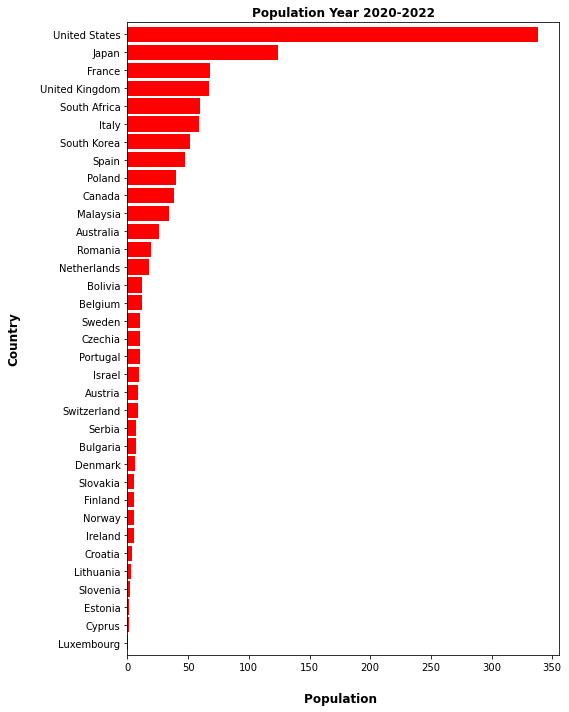

In [36]:
# hospital_patients_df=pd.DataFrame({"Hospital Patients": Average_hospital_patients})
# hospital_patients_df.tail()
 # # Consider the availability of resources relative to the demand.
# # Generate a bar plot showing the total number of hospital patients for each country.
barh = Population_df["Population (million)"].plot(kind="barh", figsize=(8, 10), color="red", zorder=2, width=0.85)
# Set x-axis label
barh.set_xlabel("Population ", labelpad=20, weight='bold', size=12)
# Set y-axis label
barh.set_ylabel("Country", labelpad=20, weight='bold', size=12)
# Set title
barh.set_title("Population Year 2020-2022",  weight='bold', size=12)
plt.tight_layout()
plt.savefig('Population Year 2020-2022.png')

In [44]:
summary_df.columns

Index(['Hospital Beds', 'Hospital Patients', 'Population (million)',
       'Median Age', 'GDP per capita', 'Excess Mortality'],
      dtype='object')

The r-squared is: 0.02114910884581008


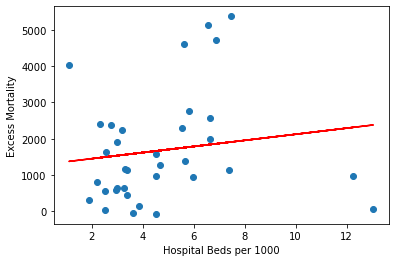

In [48]:
# Plot the different factors in a scatter plot
# Excess Mortality vs Hospital Beds
x_values = summary_df['Hospital Beds']
y_values = summary_df['Excess Mortality']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Hospital Beds per 1000')
plt.ylabel('Excess Mortality')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('Excess Mortality vs Hospital Beds.png')
plt.show()

The r-squared is: 0.0003282957592573735


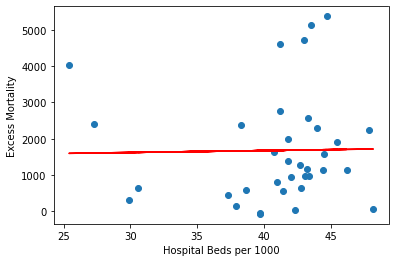

In [49]:
# Plot the different factors in a scatter plot
# Excess Mortality vs Median Age
x_values = summary_df['Median Age']
y_values = summary_df['Excess Mortality']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Hospital Beds per 1000')
plt.ylabel('Excess Mortality')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('Excess Mortality vs Median Age.png')
plt.show()

The r-squared is: 0.37998384057429363


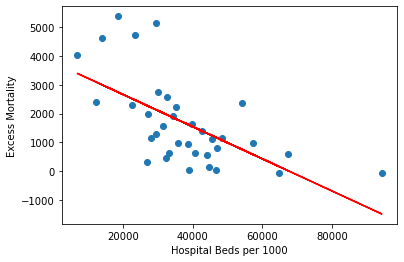

In [50]:
# Plot the different factors in a scatter plot
# Excess Mortality vs GDP per capita
x_values = summary_df['GDP per capita']
y_values = summary_df['Excess Mortality']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Hospital Beds per 1000')
plt.ylabel('Excess Mortality')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('Excess Mortality vs GDP per capita.png')
plt.show()